In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv('fifa23_cleaned.csv')

In [ ]:
data.head()

,ID,Name,Age,Height,Weight,Overall,Potential,Growth,TotalStats,BaseStats,...,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
0,158023,L. Messi,35,169,67,91,91,0,2190,452,...,75.0,96.0,20.0,35.0,24.0,6.0,11.0,15.0,14.0,8.0
1,165153,K. Benzema,34,185,81,91,91,0,2147,455,...,84.0,90.0,43.0,24.0,18.0,13.0,11.0,5.0,5.0,7.0
2,188545,R. Lewandowski,33,185,81,91,91,0,2205,458,...,90.0,88.0,35.0,42.0,19.0,15.0,6.0,12.0,8.0,10.0
3,192985,K. De Bruyne,31,181,70,91,91,0,2303,483,...,83.0,89.0,68.0,65.0,53.0,15.0,13.0,5.0,10.0,13.0
4,231747,K. Mbappé,23,182,73,91,95,4,2177,470,...,80.0,88.0,26.0,34.0,32.0,13.0,5.0,7.0,11.0,6.0


In [ ]:
needed_columns = ['ID', 'Name', 'Age', 'Height', 'Weight',
       'Overall', 'Potential', 'Growth', 'TotalStats',
       'BaseStats', 'BestPosition', 'Club', 'ValueEUR', 'WageEUR',
       'ReleaseClause', 'ContractUntil', 'ClubJoined', 'OnLoad',
       'PreferredFoot', 'IntReputation', 'WeakFoot','Nationality',
       'SkillMoves', 'AttackingWorkRate', 'DefensiveWorkRate', 'PaceTotal',
       'ShootingTotal', 'PassingTotal', 'DribblingTotal', 'DefendingTotal',
       'PhysicalityTotal', 'Crossing', 'Finishing', 'HeadingAccuracy',
       'ShortPassing', 'Volleys', 'Dribbling', 'Curve', 'FKAccuracy',
       'LongPassing', 'BallControl', 'Acceleration', 'SprintSpeed', 'Agility',
       'Reactions', 'Balance', 'ShotPower', 'Jumping', 'Stamina', 'Strength',
       'LongShots', 'Aggression', 'Interceptions', 'Positioning', 'Vision',
       'Penalties', 'Composure', 'Marking', 'StandingTackle', 'SlidingTackle',
       'GKDiving', 'GKHandling', 'GKKicking', 'GKPositioning', 'GKReflexes']


In [ ]:
data = data[needed_columns]

In [ ]:
data.head()

,ID,Name,Age,Height,Weight,Overall,Potential,Growth,TotalStats,BaseStats,...,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
0,158023,L. Messi,35,169,67,91,91,0,2190,452,...,75.0,96.0,20.0,35.0,24.0,6.0,11.0,15.0,14.0,8.0
1,165153,K. Benzema,34,185,81,91,91,0,2147,455,...,84.0,90.0,43.0,24.0,18.0,13.0,11.0,5.0,5.0,7.0
2,188545,R. Lewandowski,33,185,81,91,91,0,2205,458,...,90.0,88.0,35.0,42.0,19.0,15.0,6.0,12.0,8.0,10.0
3,192985,K. De Bruyne,31,181,70,91,91,0,2303,483,...,83.0,89.0,68.0,65.0,53.0,15.0,13.0,5.0,10.0,13.0
4,231747,K. Mbappé,23,182,73,91,95,4,2177,470,...,80.0,88.0,26.0,34.0,32.0,13.0,5.0,7.0,11.0,6.0


#Split the data into two parts

In [ ]:
X = data.drop(['BestPosition', 'Nationality', 'ID'], axis = 1)
Y = pd.DataFrame(data['BestPosition'])



In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.20, random_state = 42)

In [ ]:
X_train = X_train.drop(['Name'], axis = 1)
test_names = X_test['Name']
X_test = X_test.drop(['Name'], axis = 1)





In [ ]:
top = data.sort_values(by = 'Overall', ascending = False).head(20)

In [ ]:
top_pos = top['BestPosition']
top_names = top['Name']
top = top.drop(['Name', 'BestPosition', 'Nationality', 'ID'], axis = 1)


In [ ]:
top.head()

,Age,Height,Weight,Overall,Potential,Growth,TotalStats,BaseStats,Club,ValueEUR,...,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
4,23,182,73,91,95,4,2177,470,453,190500000,...,80.0,88.0,26.0,34.0,32.0,13.0,5.0,7.0,11.0,6.0
3,31,181,70,91,91,0,2303,483,399,107500000,...,83.0,89.0,68.0,65.0,53.0,15.0,13.0,5.0,10.0,13.0
2,33,185,81,91,91,0,2205,458,230,84000000,...,90.0,88.0,35.0,42.0,19.0,15.0,6.0,12.0,8.0,10.0
1,34,185,81,91,91,0,2147,455,494,64000000,...,84.0,90.0,43.0,24.0,18.0,13.0,11.0,5.0,5.0,7.0
0,35,169,67,91,91,0,2190,452,453,54000000,...,75.0,96.0,20.0,35.0,24.0,6.0,11.0,15.0,14.0,8.0


#Handle the imbalance dataset

<Axes: xlabel='BestPosition', ylabel='count'>

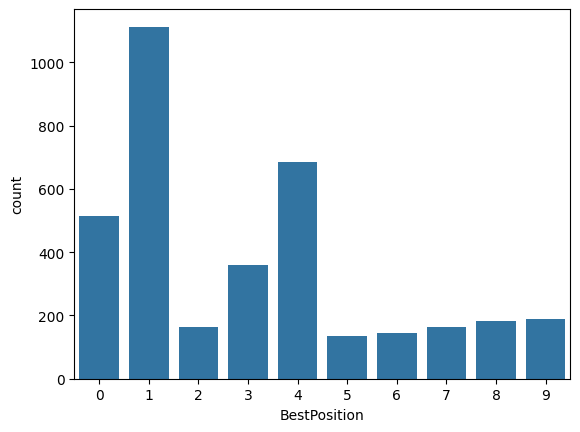

In [ ]:
sns.countplot(x = 'BestPosition', data = Y_train)

In [ ]:
from imblearn.over_sampling import RandomOverSampler

In [ ]:
oversample = RandomOverSampler(sampling_strategy = 'minority')

In [ ]:
X_train, Y_train = oversample.fit_resample(X_train, Y_train)
X_train, Y_train = oversample.fit_resample(X_train, Y_train)
X_train, Y_train = oversample.fit_resample(X_train, Y_train)
X_train, Y_train = oversample.fit_resample(X_train, Y_train)

<Axes: xlabel='BestPosition', ylabel='count'>

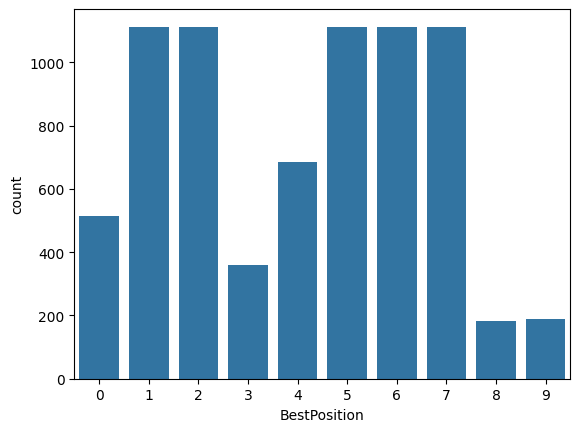

In [ ]:
sns.countplot(x = 'BestPosition', data = Y_train)

#Feature Scaling

In [ ]:
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()

X_train= mms.fit_transform(X_train)
X_test= mms.fit_transform(X_test)

top = mms.fit_transform(top)

In [ ]:
X_train.shape

(7500, 61)

In [ ]:
X_train

array([[0.6       , 0.63636364, 0.5       , ..., 0.06593407, 0.04494382,
        0.05681818],
       [0.32      , 0.45454545, 0.30434783, ..., 0.08791209, 0.11235955,
        0.11363636],
       [0.76      , 0.56818182, 0.45652174, ..., 0.13186813, 0.14606742,
        0.05681818],
       ...,
       [0.44      , 0.61363636, 0.30434783, ..., 0.13186813, 0.12359551,
        0.06818182],
       [0.76      , 0.38636364, 0.36956522, ..., 0.05494505, 0.03370787,
        0.09090909],
       [0.4       , 0.61363636, 0.39130435, ..., 0.10989011, 0.06741573,
        0.10227273]])

#Modeling

##Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score


In [ ]:
lr = LogisticRegression()
lr.fit(X_train, Y_train)
Y_pred_lr = lr.predict(X_test)
print("Logistic Regression\n", classification_report(Y_test, Y_pred_lr))

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


ValueError: Input X contains NaN.
LogisticRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

##Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf = RandomForestClassifier(criterion='entropy', n_estimators=50)
rf.fit(X_train, Y_train)
Y_pred_rf = rf.predict(X_test)
print("Random Forest\n", classification_report(Y_test, Y_pred_rf))

<ipython-input-49-37aa4c5153ee>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train, Y_train)


ValueError: Input X contains NaN.
RandomForestClassifier does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

# Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(max_features=39, max_depth=10)
dt.fit(X_train, Y_train)
Y_pred_dt = dt.predict(X_test)
print("Decision Tree\n", classification_report(Y_test, Y_pred_dt))

# Support Vector Machine

In [ ]:
from sklearn.svm import SVC

In [ ]:
svc = SVC()
svc.fit(X_train, Y_train)
Y_pred_svc = svc.predict(X_test)
print("Support Vector Machine\n", classification_report(Y_test, Y_pred_svc))

#Ensemble Methods

# AdaBoost

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

In [ ]:
ada = AdaBoostClassifier()
ada.fit(X_train, Y_train)
Y_pred_adadt = ada.predict(X_test)
print("AdaBoost\n", classification_report(Y_test, Y_pred_adadt))


# AdaBoost with Logistic Regression

In [ ]:
ada_lr = AdaBoostClassifier(base_estimator=LogisticRegression())
ada_lr.fit(X_train, Y_train)
Y_pred_adalr = ada_lr.predict(X_test)
print("AdaBoost with Logistic Regression\n", classification_report(Y_test, Y_pred_adalr))

# K-Nearest Neighbors

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, Y_train)
Y_pred_knn = knn.predict(X_test)
print("K-Nearest Neighbors\n", classification_report(Y_test, Y_pred_knn))

In [ ]:
mapping = {'CF':0, 'CM':1, 'RW':2, 'GK':3, 'CB':4, 'LW':5, 'LM': 6, 'LB':7, 'RM':8, 'RB': 9}

In [ ]:
top = pd.DataFrame(top)
for i in range(top.shape[0]):#M Salah
  pred_pos = rf.predict(top.iloc[[i]])[0] #index  = 1

  pred = list(mapping.keys())[list(mapping.values()).index(pred_pos)]#1 changes to CM
  true_pos = list(mapping.keys())[list(mapping.values()).index(top_pos.iloc[i])]#2 changes to RW

  print('Name: {} \nPredictions: {} \nTrue Position: {} \n'.format(top_names.iloc[i], pred, true_pos))



In [ ]:
list(mapping.keys())[list(mapping.values()).index(pred_pos)]

#Hyperparameter tuning

Grid Search CV

In [ ]:
from sklearn.model_selection import GridSearchCV

# Random Forest

In [ ]:
rf_param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [ ]:
rf_grid = GridSearchCV(RandomForestClassifier(), rf_param_grid, cv=5, n_jobs=-1, verbose=1)
rf_grid.fit(X_train, Y_train)
best_rf = rf_grid.best_estimator_
print("Best Random Forest Parameters:", rf_grid.best_params_)

In [ ]:
Y_pred_best_rf = best_rf.predict(X_test)
print("Random Forest\n", classification_report(Y_test, Y_pred_best_rf))

# Decision Tree

In [ ]:
dt_param_grid = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}